<a href="https://colab.research.google.com/github/Jalandhar525/SHALA2020/blob/master/DS_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Assignment - 2: Basic Data Understanding**

---

This assignment will get you familiarized with Python libraries and  functions required for data visualization.

---
## Part 1 - Loading data 
---

###Import the following libraries:  

* ```numpy``` with an alias name ```np```, 
* ```pandas``` with an alias name ```pd```, 
* ```matplotlib.pyplot``` with an alias name ```plt```, and 
* ```seaborn``` with an alias name ```sns```. 

In [0]:
# Load the four libraries with their aliases 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




### Using the files ```train.csv``` and ```moviesData.csv```,  peform the following:

* Load these file as ```pandas``` dataframes and store it in variables named ```df``` and ```movies``` respectively. 
* Print the first ten rows of ```df```. 



In [0]:
# Load the file as a dataframe 
df = pd.read_csv("https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/DataScience/L2/train.csv")
movies=pd.read_csv("https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/DataScience/L2/moviesData.csv")


In [0]:
# Print the first ten rows of df
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6,5
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0,6
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0,7
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7,9


### Using the dataframe ```df```, perform the following: 

* Print the first five rows of the column ```MonthlyRate```. 
* Find out the details of the column ```MonthlyRate``` like mean, maximum value, minimum value, etc. 

In [0]:
# Print the first five rows of MonthlyRate
df["MonthlyRate"].head(5)

0    19479
1    24907
2     2396
3    23159
4    16632
Name: MonthlyRate, dtype: int64

In [0]:
# Find the details of MonthlyRate 
df["MonthlyRate"].describe()

count     1028.000000
mean     14243.531128
std       7048.768076
min       2094.000000
25%       8259.750000
50%      14074.500000
75%      20342.250000
max      26999.000000
Name: MonthlyRate, dtype: float64

---
## Part 2 - Cleaning and manipulating data 
---

### Using the dataframe ```df```, peform the following:

* Check whether there are any missing values in ```df```. 
* If yes, drop those values and print the size of ```df``` after dropping these. 

In [0]:
# Check for missing values 
print(df.isnull().sum())

# Drop the missing values 

df.dropna()
# Print the size of df after dropping 
print("Shape of df after dropping {}".format(df.shape))


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
ID        

### Using the dataframe ```df```, peform the following:

* Add another column named ```MonthRateNew``` in ```df``` by subtracting the mean from ```MonthlyRate``` and dividing it by standard deviation. 

In [0]:
# Add a column named MonthRateNew 
df["MonthlyRateNew"]=(df["MonthlyRate"]-df["MonthlyRate"].mean())/df["MonthlyRate"].std()
df["MonthlyRateNew"]
df.shape

(1028, 35)

### Using the dataframe ```movies```, perform the following: 

* Check whether there are any missing values in ```movies```. 
* Find out the number of observations/rows having any of their features/columns missing. 
* Drop the missing values and print the size of ```movies``` after dropping these. 
* Instead of dropping the missing values, replace the missing values by their mean (or some suitable value). 


In [0]:
# Check for missing values 
movies.info()
print(movies.shape)
# Drop the missing values 
# movies.dropna(inplace=True)
# print(movies.shape)
# Replace the missing values 
# You can use SimpleImputer of sklearn for this
numerical_data=movies.select_dtypes(include=np.number)
categorical_data=movies.select_dtypes(include='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        600 non-null    int64  
 1   title             600 non-null    object 
 2   title_type        600 non-null    object 
 3   genre             600 non-null    object 
 4   runtime           599 non-null    float64
 5   mpaa_rating       600 non-null    object 
 6   studio            595 non-null    object 
 7   thtr_rel_year     600 non-null    int64  
 8   thtr_rel_month    600 non-null    int64  
 9   thtr_rel_day      600 non-null    int64  
 10  dvd_rel_year      593 non-null    float64
 11  dvd_rel_month     593 non-null    float64
 12  dvd_rel_day       593 non-null    float64
 13  imdb_rating       600 non-null    float64
 14  imdb_num_votes    600 non-null    int64  
 15  critics_rating    600 non-null    object 
 16  critics_score     600 non-null    int64  
 1

In [0]:
#Using Sklearn Simple Imputer
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
numerical_data=pd.DataFrame(imputer.fit_transform(numerical_data))
print(numerical_data)
movies=pd.concat([numerical_data,categorical_data],axis=1)
movies.isnull().sum()

        0      1       2     3     4   ...    7    8        9     10    11
0      1.0   80.0  2013.0   4.0  19.0  ...  30.0  5.5    899.0  45.0  73.0
1      2.0  101.0  2001.0   3.0  14.0  ...  28.0  7.3  12285.0  96.0  81.0
2      3.0   84.0  1996.0   8.0  21.0  ...  21.0  7.6  22381.0  91.0  91.0
3      4.0  139.0  1993.0  10.0   1.0  ...   6.0  7.2  35096.0  80.0  76.0
4      5.0   90.0  2004.0   9.0  10.0  ...  19.0  5.1   2386.0  33.0  27.0
..     ...    ...     ...   ...   ...  ...   ...  ...      ...   ...   ...
595  596.0   97.0  2008.0   7.0  11.0  ...  28.0  5.9   8345.0  44.0  26.0
596  597.0   82.0  1998.0   1.0  16.0  ...  30.0  6.7  46794.0  29.0  81.0
597  598.0   87.0  2008.0   3.0   9.0  ...  14.0  5.9  10087.0  80.0  52.0
598  599.0  120.0  2004.0   6.0  16.0  ...   2.0  5.8  66054.0  31.0  34.0
599  600.0   97.0  2012.0   5.0   4.0  ...  31.0  4.2  43574.0  17.0  51.0

[600 rows x 12 columns]


0                    0
1                    0
2                    0
3                    0
4                    0
5                    0
6                    0
7                    0
8                    0
9                    0
10                   0
11                   0
title                0
title_type           0
genre                0
mpaa_rating          0
studio               5
critics_rating       0
audience_rating      0
best_pic_nom         0
best_pic_win         0
best_actor_win       0
best_actress_win     0
best_dir_win         0
top200_box           0
director             2
actor1               2
actor2               7
actor3               9
actor4              12
actor5              14
dtype: int64

---
## Part 3 - Visualizing data 
---

### Visualize the ```df``` by drawing the following plots:

* Plot a histogram of ```Age``` and find the range in which most people are there. 
* Modify the histogram of ```Age``` by adding 30 bins. 
* Draw a scatter plot between ```Age``` and ```Attrition``` and suitable labels to the axes. Find out whether people more than 50 years are more likely to leave the company. (```Attrition``` = 1 means people have left the company). 

(array([15.,  9., 22.,  7., 17., 52., 36., 75., 46., 45., 83., 51., 99.,
        41., 37., 59., 29., 56., 21., 27., 36., 12., 37., 18., 17., 27.,
        16., 13., 11., 14.]),
 array([18. , 19.4, 20.8, 22.2, 23.6, 25. , 26.4, 27.8, 29.2, 30.6, 32. ,
        33.4, 34.8, 36.2, 37.6, 39. , 40.4, 41.8, 43.2, 44.6, 46. , 47.4,
        48.8, 50.2, 51.6, 53. , 54.4, 55.8, 57.2, 58.6, 60. ]),
 <a list of 30 Patch objects>)

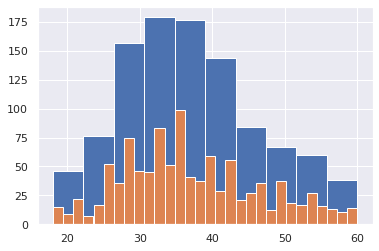

In [0]:
# Plot and modify the histogram of Age
plt.hist(df.Age)
plt.hist(df.Age,bins=30)



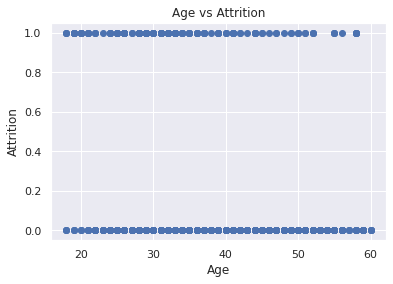

In [0]:
# Draw a scatter plot between Age and Attrition
plt.scatter(df.Age,df.Attrition)
plt.xlabel("Age")
plt.ylabel("Attrition")
plt.title("Age vs Attrition")
plt.show()


### Visualize the ```df``` by following the steps given below:

* Get a series containing counts of unique values of ```Attrition```.
* Draw a countplot for ```Attrition``` using ```sns.countplot()```. 

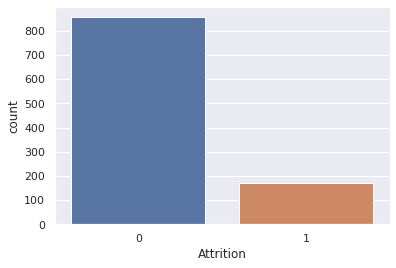

In [0]:
# Get a series of counts of values of Attrition
series=df.Attrition.value_counts()
series
# Draw a countplot for Attrition 
# You may use countplot of seaborn for this 
%matplotlib inline
sns.set(style="darkgrid")
ax = sns.countplot(x='Attrition',  data=df)
plt.show()


### Visualize the ```df``` by following the steps given below:

* Draw a cross tabulation of ```Attrition``` and ```BusinessTravel``` as bar charts. Find which value of ```BusinessTravel``` has highest number of people.

In [0]:
# Draw a cross tab of Attritiona and BusinessTravel 
# You may use crosstab of pandas for this 
pd.crosstab(df['Attrition'],df["BusinessTravel"])


BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
0,92,150,614
1,10,47,115


<BarContainer object of 1028 artists>

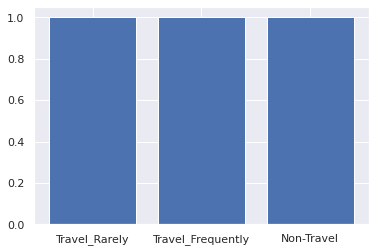

In [0]:
plt.bar(df["BusinessTravel"],df["Attrition"])



### Visualize the ```df``` by drawing the following plot:

* Draw a stacked bar chart between ```Attrition``` and ```Gender``` columns. 

In [0]:
# Draw a stacked bar chart between Attrition and Gender 
df.plot(x='Gender',y='Attrition',stacked=True,kind='bar')


### Visualize the ```df``` by drawing the following histogram:

* Draw a histogram of ```TotalWorkingYears``` with 30 bins. 
* Draw a histogram of ```YearsAtCompany``` with 30 bins and find whether the values in ```YearsAtCompany``` are skewed. 

(array([ 65.,  24.,  32., 108.,  87.,  54., 140., 133.,  19.,  61.,  17.,
         21.,  53.,  20.,  15.,  47.,  20.,  16.,  21.,  13.,   2.,  17.,
          6.,   9.,  14.,   3.,   1.,   7.,   1.,   2.]),
 array([ 0.        ,  1.33333333,  2.66666667,  4.        ,  5.33333333,
         6.66666667,  8.        ,  9.33333333, 10.66666667, 12.        ,
        13.33333333, 14.66666667, 16.        , 17.33333333, 18.66666667,
        20.        , 21.33333333, 22.66666667, 24.        , 25.33333333,
        26.66666667, 28.        , 29.33333333, 30.66666667, 32.        ,
        33.33333333, 34.66666667, 36.        , 37.33333333, 38.66666667,
        40.        ]),
 <a list of 30 Patch objects>)

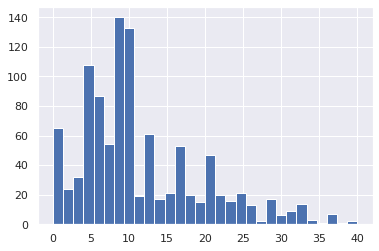

In [0]:
# Draw a histogram of TotalWorkingYears with 30 bins
plt.hist(df["TotalWorkingYears"],bins=30)



(array([156.,  84.,  93., 202.,  57.,  62., 121.,  78.,  23.,  24.,  10.,
         12.,  16.,  11.,   9.,  31.,   9.,   0.,  10.,   3.,   2.,   2.,
          0.,   3.,   6.,   1.,   0.,   2.,   0.,   1.]),
 array([ 0.        ,  1.33333333,  2.66666667,  4.        ,  5.33333333,
         6.66666667,  8.        ,  9.33333333, 10.66666667, 12.        ,
        13.33333333, 14.66666667, 16.        , 17.33333333, 18.66666667,
        20.        , 21.33333333, 22.66666667, 24.        , 25.33333333,
        26.66666667, 28.        , 29.33333333, 30.66666667, 32.        ,
        33.33333333, 34.66666667, 36.        , 37.33333333, 38.66666667,
        40.        ]),
 <a list of 30 Patch objects>)

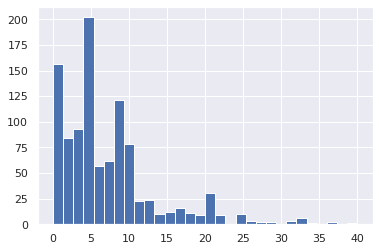

In [0]:
# Draw a histogram of YearsAtCompany
plt.hist(df["YearsAtCompany"],bins=30)


### Visualize the ```df``` by drawing the following boxplot:

* Draw a boxplot of ```MonthlyIncome``` for each ```Department``` and report whether there is/are outlier(s). 


[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

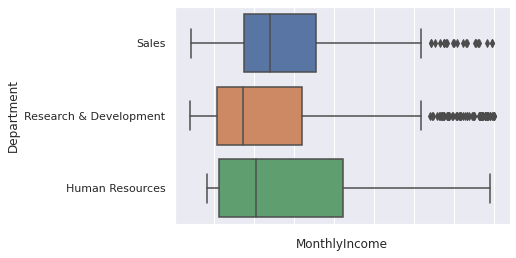

In [0]:
# Draw a boxplot of MonthlyIncome for each Department and report outliers 
chart = sns.boxplot('MonthlyIncome', 'Department', data=df)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)


### Visualize the ```df``` by drawing the following piechart:

* Create a pie chart of the values in ```JobRole``` with suitable label and report which role has highest number of persons. 

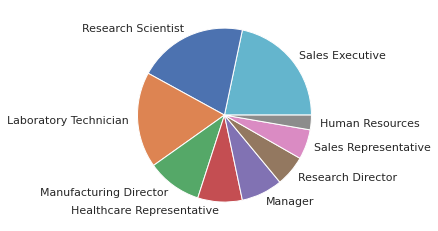

In [0]:
# Create a piechart of JobRole 
# You will need to find the counts of unique values in JobRole. 
plt.pie(df.JobRole.value_counts())
plt.pie(df.JobRole.value_counts(), labels=df.JobRole.value_counts().index.tolist())
plt.show()

